# Preliminary EDA

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
pd.set_option('display.max_columns', None)

In [2]:
# read csv
daily_dataset = pd.read_csv('../../data/Smart meters in London/daily_dataset.csv')
acorn_details = pd.read_csv('../../data/Smart meters in London/acorn_details.csv', encoding= 'unicode_escape')
household_info = pd.read_csv('../../data/Smart meters in London/informations_households.csv')
holidays = pd.read_csv('../../data/Smart meters in London/uk_bank_holidays.csv')
weather_daily = pd.read_csv('../../data/Smart meters in London/weather_daily_darksky.csv')
weather_hourly = pd.read_csv('../../data/Smart meters in London/weather_hourly_darksky.csv')

In [3]:
daily_dataset.head(20)

,LCLid,day,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min
0,MAC000131,2011-12-15,0.4850,0.432045,0.868,22,0.239146,9.505,0.072
1,MAC000131,2011-12-16,0.1415,0.296167,1.116,48,0.281471,14.216,0.031
2,MAC000131,2011-12-17,0.1015,0.189812,0.685,48,0.188405,9.111,0.064
3,MAC000131,2011-12-18,0.1140,0.218979,0.676,48,0.202919,10.511,0.065
4,MAC000131,2011-12-19,0.1910,0.325979,0.788,48,0.259205,15.647,0.066
5,MAC000131,2011-12-20,0.2180,0.357500,1.077,48,0.287597,17.160,0.066
6,MAC000131,2011-12-21,0.1305,0.235083,0.705,48,0.222070,11.284,0.066
7,MAC000131,2011-12-22,0.0890,0.221354,1.094,48,0.267239,10.625,0.062
8,MAC000131,2011-12-23,0.1605,0.291125,0.749,48,0.249076,13.974,0.065
9,MAC000131,2011-12-24,0.1070,0.169000,0.613,47,0.150685,7.943,0.065


In [4]:
daily_dataset['day'] = pd.to_datetime(daily_dataset['day'])
daily_dataset.head(20)

,LCLid,day,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min
0,MAC000131,2011-12-15,0.4850,0.432045,0.868,22,0.239146,9.505,0.072
1,MAC000131,2011-12-16,0.1415,0.296167,1.116,48,0.281471,14.216,0.031
2,MAC000131,2011-12-17,0.1015,0.189812,0.685,48,0.188405,9.111,0.064
3,MAC000131,2011-12-18,0.1140,0.218979,0.676,48,0.202919,10.511,0.065
4,MAC000131,2011-12-19,0.1910,0.325979,0.788,48,0.259205,15.647,0.066
5,MAC000131,2011-12-20,0.2180,0.357500,1.077,48,0.287597,17.160,0.066
6,MAC000131,2011-12-21,0.1305,0.235083,0.705,48,0.222070,11.284,0.066
7,MAC000131,2011-12-22,0.0890,0.221354,1.094,48,0.267239,10.625,0.062
8,MAC000131,2011-12-23,0.1605,0.291125,0.749,48,0.249076,13.974,0.065
9,MAC000131,2011-12-24,0.1070,0.169000,0.613,47,0.150685,7.943,0.065


In [5]:
# 计算每一天中所有LCL energy之和
ds = daily_dataset.groupby(by='day').sum()
ds.head(20)

C:\Users\xiaojs20\AppData\Local\Temp\ipykernel_16140\2093851664.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ds = daily_dataset.groupby(by='day').sum()


,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min
day,,,,,,,
2011-11-23,2.9660,3.654184,9.835,334,2.264165,90.385000,1.113
2011-11-24,4.8395,5.855170,19.046,922,3.909215,213.412000,2.019
2011-11-25,5.6890,7.196841,23.246,1383,4.962879,303.993000,2.283
2011-11-26,8.3345,10.153053,33.868,1773,7.115718,420.976000,3.002
2011-11-27,7.4235,9.268396,35.484,1968,7.180928,444.883001,2.867
2011-11-28,9.6630,12.041963,43.831,2319,9.067598,500.686000,3.572
2011-11-29,10.1530,13.476996,48.589,2833,10.045756,584.317000,4.272
2011-11-30,11.9910,15.505984,56.021,3349,11.550550,669.827000,5.033
2011-12-01,16.0465,20.205548,74.866,4058,15.642704,848.949001,5.226


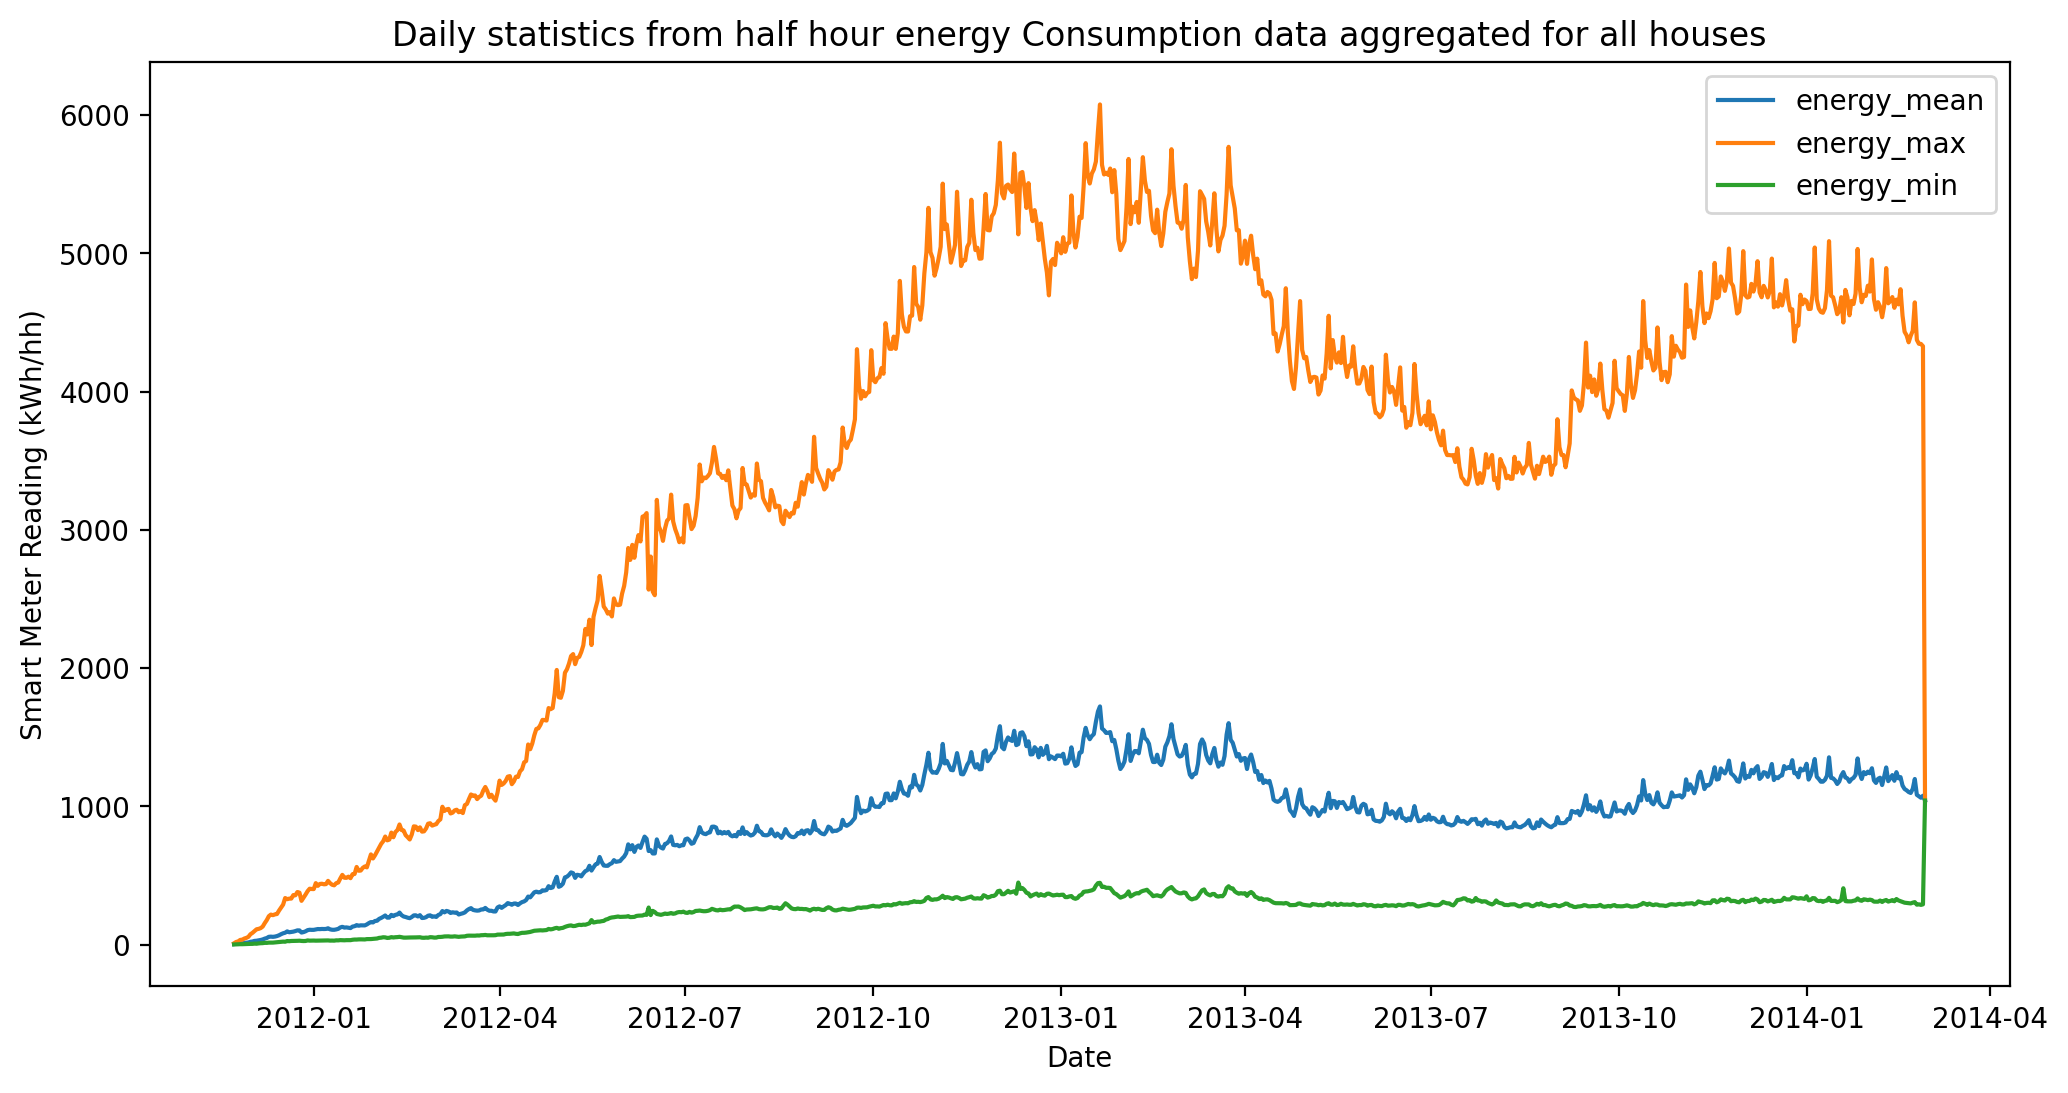

In [6]:
plt.figure(figsize=(12,6))
features = ['energy_mean', 'energy_max', 'energy_min']
for feature in features:
    plt.plot(ds[feature],label=feature)
plt.legend()
plt.xlabel('Date')
plt.ylabel('Smart Meter Reading (kWh/hh)')
plt.title('Daily statistics from half hour energy Consumption data aggregated for all houses')
plt.savefig('../../figures/load_figs/energy Consumption data aggregated for all houses.png')

In [7]:
def plot_series(df, cols=None, title='Title', xlab=None, ylab=None): #, steps=1):
    
    plt.figure(figsize=(9, 6))
    
    # Iterate through each column name.
    for col in cols:
        df[col].plot()
    plt.legend()    
    
    # Generate title and labels.
    plt.title(title, fontsize=13)
    plt.xlabel(xlab, fontsize=11)
    plt.ylabel(ylab, fontsize=11)

Text(0, 0.5, 'total number of readings')

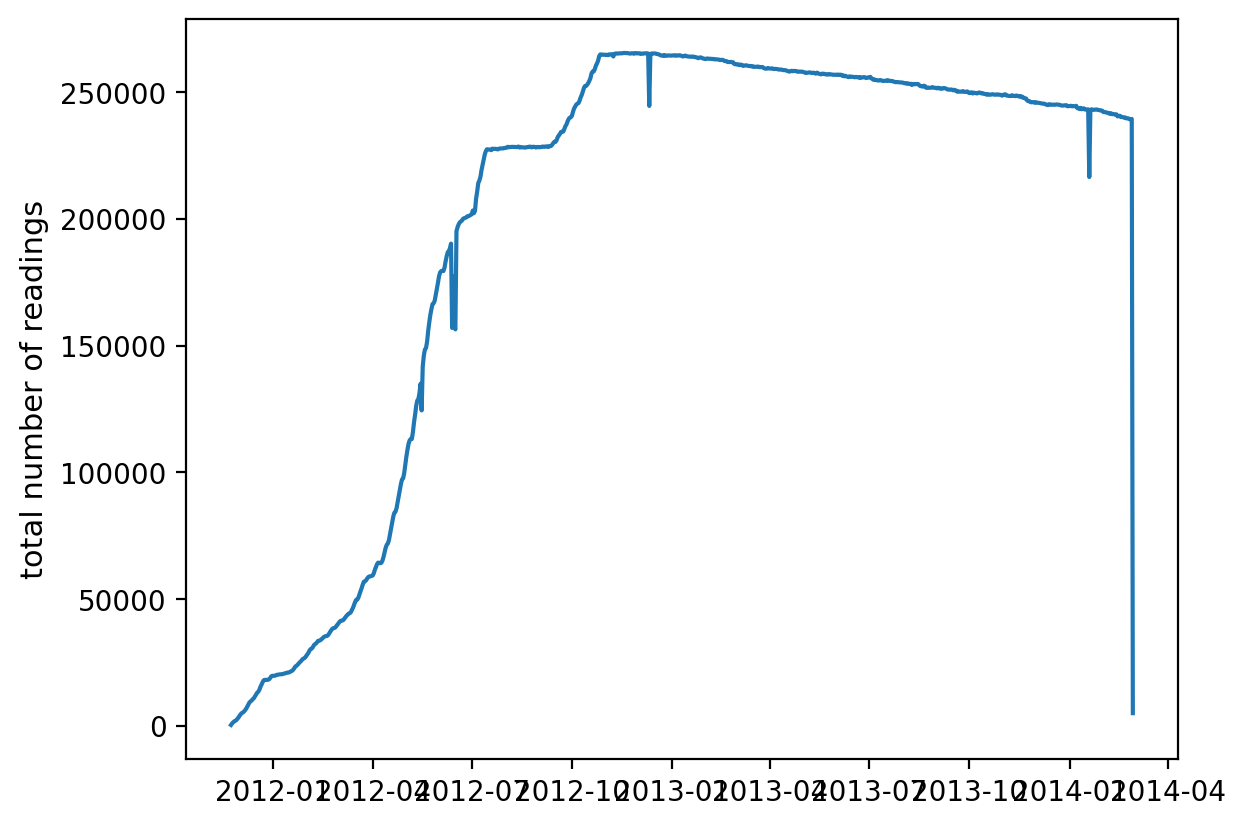

In [8]:
plt.plot(ds['energy_count'])
plt.ylabel('total number of readings', fontsize=11)

In [9]:
daily_dataset.isnull().sum()

LCLid                0
day                  0
energy_median       30
energy_mean         30
energy_max          30
energy_count         0
energy_std       11331
energy_sum          30
energy_min          30
dtype: int64

In [10]:
ds.isnull().sum()

energy_median    0
energy_mean      0
energy_max       0
energy_count     0
energy_std       0
energy_sum       0
energy_min       0
dtype: int64

#### It appears as though some houses have no readings for the first year or so. I will pick one house that has readings for all dates and plot its consumption. 

#### First get rid of any houses with few readings less than 100

In [11]:
daily_reading_sum = daily_dataset.groupby(by = 'LCLid').sum().sort_values(by='energy_count',ascending=False)
daily_reading_sum.head(7)

C:\Users\xiaojs20\AppData\Local\Temp\ipykernel_16140\3529266726.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  daily_reading_sum = daily_dataset.groupby(by = 'LCLid').sum().sort_values(by='energy_count',ascending=False)


,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min
LCLid,,,,,,,
MAC000147,91.3405,114.088231,530.741000,39724,95.692628,5471.659001,25.925
MAC000145,164.3830,216.385232,780.897999,39724,157.269612,10372.568998,65.085
MAC000150,111.1510,168.599298,773.568000,39719,154.925583,8078.815999,51.010
MAC000152,107.3800,160.897390,677.631999,39718,145.796023,7710.611999,31.114
MAC000148,83.4795,84.602893,93.975000,39717,4.439667,4052.553000,79.154
MAC000149,30.1710,41.827282,136.955000,39717,30.924856,2005.705000,11.808
MAC000153,344.9815,533.097096,1798.373997,39713,462.040253,25456.799999,147.004


In [12]:
no_readings = list(daily_reading_sum.loc[daily_reading_sum['energy_count'] < 100].index)

In [13]:
house_0 = 'MAC000145'
single_house_daily = daily_dataset.loc[daily_dataset['LCLid']==house_0, :]
single_house_daily.set_index('day', inplace=True)

In [14]:
single_house_daily.head()

,LCLid,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min
day,,,,,,,,
2011-11-23,MAC000145,0.2575,0.298400,0.928,30,0.166282,8.952,0.094
2011-11-24,MAC000145,0.2250,0.252812,0.625,48,0.135267,12.135,0.092
2011-11-25,MAC000145,0.2405,0.285833,1.020,48,0.165789,13.720,0.134
2011-11-26,MAC000145,0.2900,0.317375,0.845,48,0.138187,15.234,0.137
2011-11-27,MAC000145,0.2485,0.274771,0.777,48,0.172795,13.189,0.066


Text(0.5, 1.0, 'Daily consumption for one house with complete data')

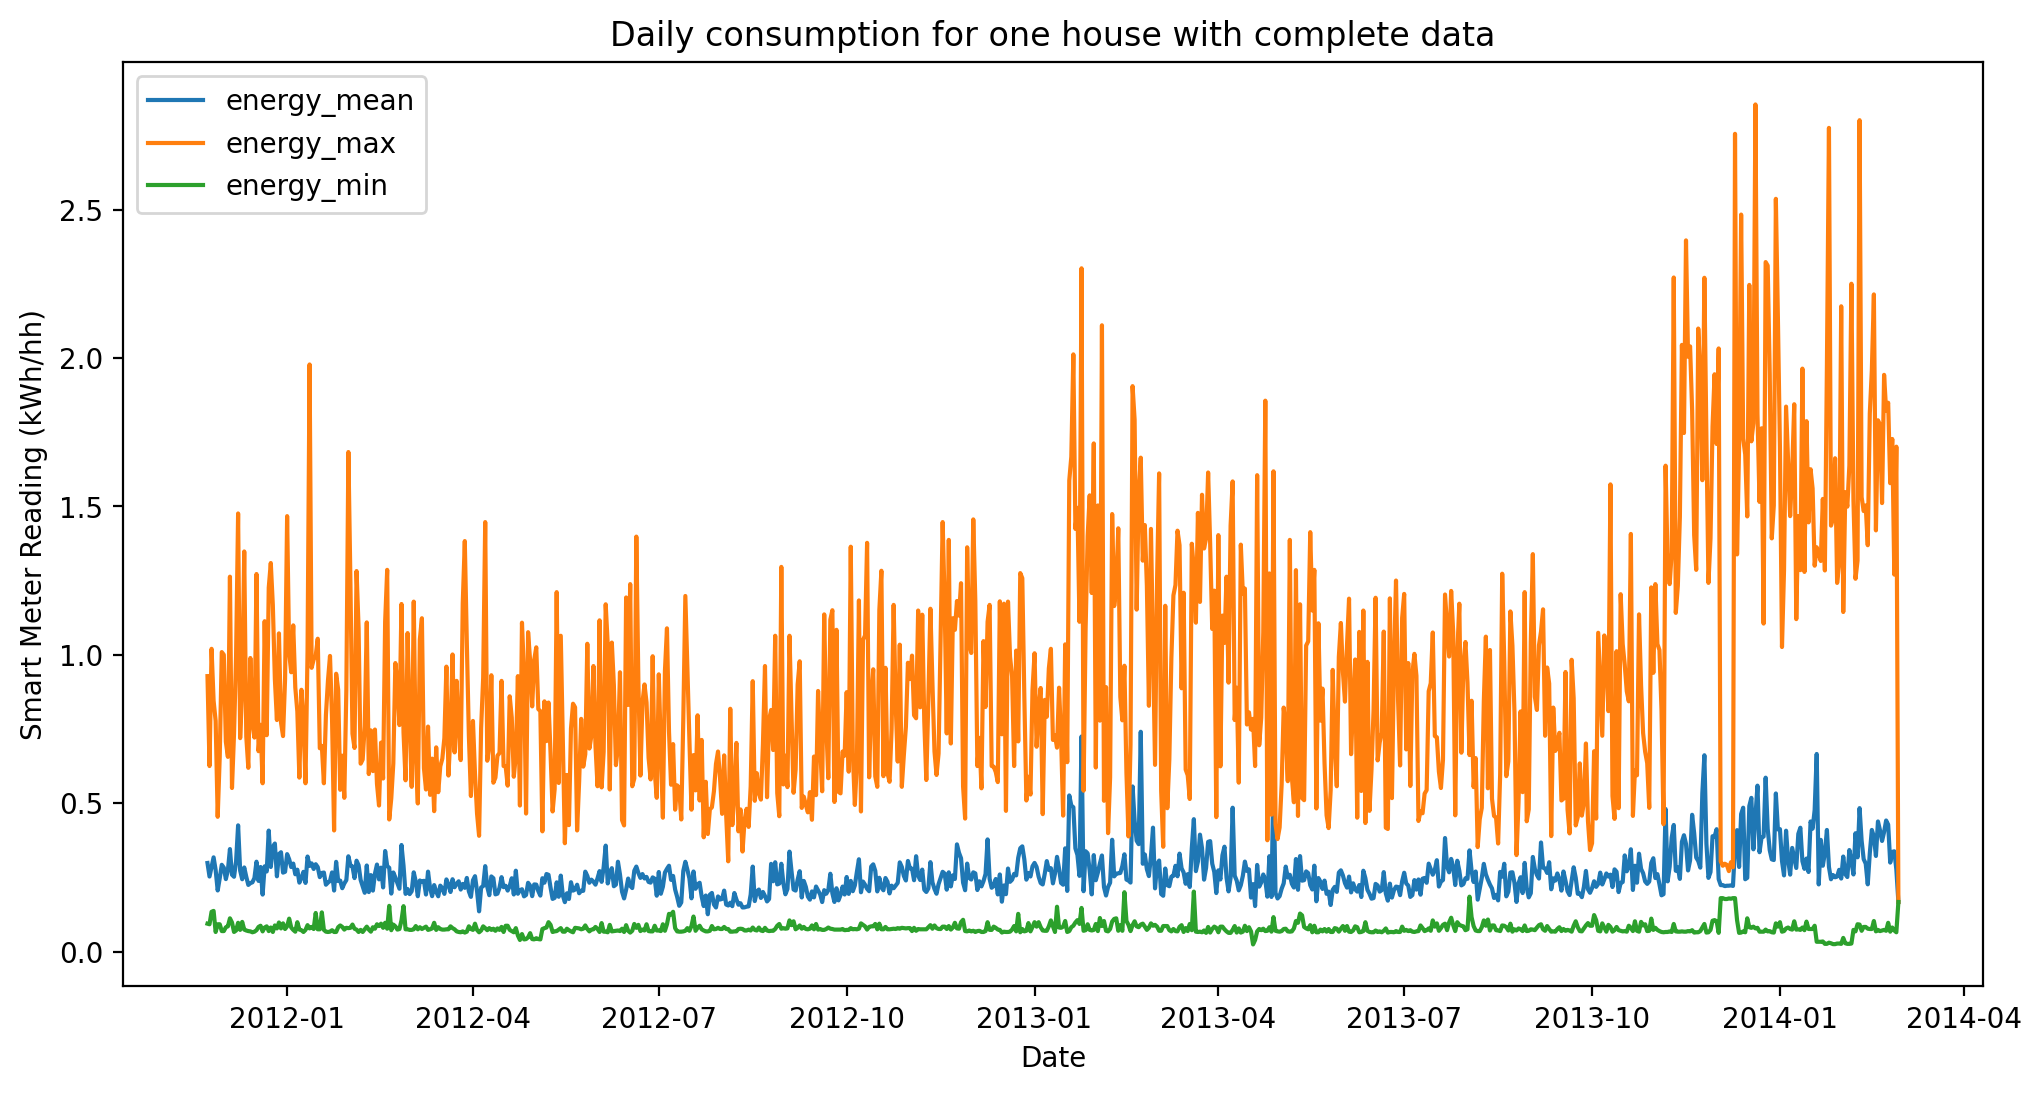

In [15]:
plt.figure(figsize=(12,6))
features = ['energy_mean', 'energy_max', 'energy_min']
for feature in features:
    plt.plot(single_house_daily[feature],label=feature)
plt.legend()
plt.xlabel('Date')
plt.ylabel('Smart Meter Reading (kWh/hh)')
plt.title('Daily consumption for one house with complete data')

## Create a master dataframe of daily data sums and daily data with acorn info

In [16]:
daily_dataset.isnull().sum()

LCLid                0
day                  0
energy_median       30
energy_mean         30
energy_max          30
energy_count         0
energy_std       11331
energy_sum          30
energy_min          30
dtype: int64

In [17]:
for house in list(daily_dataset.loc[daily_dataset['energy_median'].isnull(),:]['LCLid']):
    daily_dataset = daily_dataset.loc[daily_dataset['LCLid'] != house, :].copy()

In [18]:
master_daily = pd.merge(daily_dataset, household_info)

In [19]:
master_ds = daily_dataset.groupby(by='day').sum()

C:\Users\xiaojs20\AppData\Local\Temp\ipykernel_16140\3560427805.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  master_ds = daily_dataset.groupby(by='day').sum()


In [20]:
master_ds.head(2)

,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min
day,,,,,,,
2011-11-23,2.9660,3.654184,9.835,334,2.264165,90.385,1.113
2011-11-24,4.8395,5.855170,19.046,922,3.909215,213.412,2.019


In [52]:
master_daily['day'] = pd.to_datetime(master_daily['day'])
master_daily.set_index('day', inplace=True)
master_daily.head()

KeyError: 'day'

#### merge in the weather data points

In [24]:
weather_daily.head(2)

,temperatureMax,temperatureMaxTime,windBearing,icon,dewPoint,temperatureMinTime,cloudCover,windSpeed,pressure,apparentTemperatureMinTime,apparentTemperatureHigh,precipType,visibility,humidity,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureMax,uvIndex,time,sunsetTime,temperatureLow,temperatureMin,temperatureHigh,sunriseTime,temperatureHighTime,uvIndexTime,summary,temperatureLowTime,apparentTemperatureMin,apparentTemperatureMaxTime,apparentTemperatureLowTime,moonPhase
0,11.96,2011-11-11 23:00:00,123,fog,9.40,2011-11-11 07:00:00,0.79,3.88,1016.08,2011-11-11 07:00:00,10.87,rain,3.30,0.95,2011-11-11 19:00:00,10.87,11.96,1.0,2011-11-11 00:00:00,2011-11-11 16:19:21,10.87,8.85,10.87,2011-11-11 07:12:14,2011-11-11 19:00:00,2011-11-11 11:00:00,Foggy until afternoon.,2011-11-11 19:00:00,6.48,2011-11-11 23:00:00,2011-11-11 19:00:00,0.52
1,8.59,2011-12-11 14:00:00,198,partly-cloudy-day,4.49,2011-12-11 01:00:00,0.56,3.94,1007.71,2011-12-11 02:00:00,5.62,rain,12.09,0.88,2011-12-11 19:00:00,-0.64,5.72,1.0,2011-12-11 00:00:00,2011-12-11 15:52:53,3.09,2.48,8.59,2011-12-11 07:57:02,2011-12-11 14:00:00,2011-12-11 12:00:00,Partly cloudy throughout the day.,2011-12-12 07:00:00,0.11,2011-12-11 20:00:00,2011-12-12 08:00:00,0.53


In [25]:
# fix the time missalignment
weather_daily['day'] = weather_daily['time'].str.replace('23:00:00', '00:00:00')
# set day to be the index for the weather data so it can be merged
weather_daily['day'] = pd.to_datetime(weather_daily['day'])
weather_daily.set_index('day', inplace=True)

In [26]:
# create master data frame
master_daily = pd.merge(master_daily, weather_daily.loc[:, ['temperatureMax', 'temperatureLow', 'windSpeed', 'cloudCover', 'humidity', 'visibility']], left_index=True, right_index=True, how='left')

In [27]:
master_ds = pd.merge(master_ds, weather_daily.loc[:, ['temperatureMax', 'temperatureLow', 'windSpeed', 'cloudCover', 'humidity', 'visibility']], left_index=True, right_index=True, how='left')


In [28]:
master_ds.isnull().sum()

energy_median     0
energy_mean       0
energy_max        0
energy_count      0
energy_std        0
energy_sum        0
energy_min        0
temperatureMax    2
temperatureLow    2
windSpeed         2
cloudCover        3
humidity          2
visibility        2
dtype: int64

#### Fix the weather nulls

In [29]:
null_list = ['temperatureMax', 'temperatureLow', 'windSpeed', 'cloudCover', 'humidity', 'visibility']

In [30]:
for i in master_ds.loc[master_ds['temperatureMax'].isnull(),:].index:
    print(i)

2012-10-28 00:00:00
2013-10-27 00:00:00


In [31]:
for feature in null_list:
    master_ds.loc[master_ds.index == '2012-10-28 00:00:00', feature] = list(master_ds.loc[master_ds.index == '2012-10-27 00:00:00', feature])[0]
    master_ds.loc[master_ds.index == '2013-10-27 00:00:00', feature] = list(master_ds.loc[master_ds.index == '2013-10-26 00:00:00', feature])[0]

In [32]:
master_ds.loc[master_ds['cloudCover'].isnull(), 'cloudCover'] = master_ds['cloudCover'].mean()

In [33]:
master_ds.isnull().sum()

energy_median     0
energy_mean       0
energy_max        0
energy_count      0
energy_std        0
energy_sum        0
energy_min        0
temperatureMax    0
temperatureLow    0
windSpeed         0
cloudCover        0
humidity          0
visibility        0
dtype: int64

#### Adjust holiday data frame to merge with master

In [34]:
holidays.head()

,Bank holidays,Type
0,2012-12-26,Boxing Day
1,2012-12-25,Christmas Day
2,2012-08-27,Summer bank holiday
3,2012-05-06,Queen?s Diamond Jubilee (extra bank holiday)
4,2012-04-06,Spring bank holiday (substitute day)


In [35]:
holidays['holiday'] = holidays['Type']
holidays['date'] = pd.to_datetime(holidays['Bank holidays'])
holidays.set_index('date', inplace=True)
holidays.drop(columns=['Bank holidays', 'Type'], inplace=True)

#### Add a column labeling holidays

In [36]:
holidays.head()

,holiday
date,
2012-12-26,Boxing Day
2012-12-25,Christmas Day
2012-08-27,Summer bank holiday
2012-05-06,Queen?s Diamond Jubilee (extra bank holiday)
2012-04-06,Spring bank holiday (substitute day)


In [37]:
import warnings
warnings.simplefilter(action="ignore")

master_daily['holiday'] = 0

for i in list(holidays.index):
    for j, k in enumerate(list(master_daily.index)):
        if i == k:
            master_daily['holiday'][j] = 1

In [38]:
holiday_list = np.array(master_daily['holiday'])

In [39]:
master_daily['holiday'].value_counts()

0    3431404
1      80530
Name: holiday, dtype: int64

In [40]:
master_ds.head()

,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min,temperatureMax,temperatureLow,windSpeed,cloudCover,humidity,visibility
day,,,,,,,,,,,,,
2011-11-23,2.9660,3.654184,9.835,334,2.264165,90.385000,1.113,10.36,8.24,2.04,0.36,0.93,8.06
2011-11-24,4.8395,5.855170,19.046,922,3.909215,213.412000,2.019,12.93,9.71,4.04,0.41,0.89,10.64
2011-11-25,5.6890,7.196841,23.246,1383,4.962879,303.993000,2.283,13.03,7.01,5.02,0.48,0.79,12.38
2011-11-26,8.3345,10.153053,33.868,1773,7.115718,420.976000,3.002,12.96,11.59,5.75,0.44,0.81,13.07
2011-11-27,7.4235,9.268396,35.484,1968,7.180928,444.883001,2.867,13.54,1.31,5.48,0.42,0.72,13.08


In [41]:
master_ds = pd.merge(master_ds, holidays, left_index=True, right_index=True, how='left')
master_ds['day_off'] = master_ds['holiday']

In [42]:
master_ds['holiday'] = np.where(master_ds['day_off'].isnull(), 0, 1)

In [43]:
master_ds.drop(columns='day_off', inplace=True)

In [44]:
master_ds.isnull().sum()

energy_median     0
energy_mean       0
energy_max        0
energy_count      0
energy_std        0
energy_sum        0
energy_min        0
temperatureMax    0
temperatureLow    0
windSpeed         0
cloudCover        0
humidity          0
visibility        0
holiday           0
dtype: int64

In [45]:
master_daily.isnull().sum()

LCLid                 0
energy_median         0
energy_mean           0
energy_max            0
energy_count          0
energy_std        11288
energy_sum            0
energy_min            0
stdorToU              0
Acorn                 0
Acorn_grouped         0
file                  0
temperatureMax    10696
temperatureLow    10696
windSpeed         10696
cloudCover        15787
humidity          10696
visibility        10696
holiday               0
dtype: int64

### Make the tax column numeric

In [46]:
master_daily['stdorToU'].value_counts()

Std    2804907
ToU     707027
Name: stdorToU, dtype: int64

In [47]:
master_daily['tax'] = np.where(master_daily['stdorToU'] == 'ToU', 1, 0)
master_daily.drop(columns='stdorToU', inplace=True)

**Drop rows where the acorn is incorrectly labeled ACORN -**

In [48]:
master_daily.shape

(3511934, 19)

In [49]:
master_daily = master_daily.loc[master_daily['Acorn'] != 'ACORN-', :]

In [50]:
master_daily.head()

,LCLid,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min,Acorn,Acorn_grouped,file,temperatureMax,temperatureLow,windSpeed,cloudCover,humidity,visibility,holiday,tax
day,,,,,,,,,,,,,,,,,,,
2011-11-23,MAC000152,0.1725,0.248708,0.798,24,0.193996,5.969,0.055,ACORN-E,Affluent,block_24,10.36,8.24,2.04,0.36,0.93,8.06,0,0
2011-11-23,MAC000153,0.6765,0.904250,2.407,24,0.592275,21.702,0.261,ACORN-E,Affluent,block_24,10.36,8.24,2.04,0.36,0.93,8.06,0,0
2011-11-23,MAC000156,0.2745,0.296500,0.512,22,0.108046,6.523,0.162,ACORN-F,Comfortable,block_48,10.36,8.24,2.04,0.36,0.93,8.06,0,0
2011-11-23,MAC000147,0.0750,0.108429,0.315,28,0.071653,3.036,0.033,ACORN-F,Comfortable,block_53,10.36,8.24,2.04,0.36,0.93,8.06,0,1
2011-11-23,MAC000154,0.1740,0.252087,0.999,23,0.219155,5.798,0.098,ACORN-Q,Adversity,block_101,10.36,8.24,2.04,0.36,0.93,8.06,0,0


In [51]:
master_daily.to_csv('../../data/Smart meters in London/daily_master.csv')
master_ds.to_csv('../../data/Smart meters in London/ds_master.csv')